# Titianic Dataset Descrition
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Number of Objects = 1309 
Number of Features = 10
train and test Split is 1/3 by 2/3

### Variable Definition	Key
* Survived	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	gender	
* Age	Age in years	
* sibsp 	# of siblings / spouses aboard the Titanic	
* parch	  # of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [33]:
from sklearn import tree
import random
import pandas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from astropy.table import Table, Column
import numpy as np
import graphviz 
from sklearn import metrics

## loading the dataset

In [34]:
data = pandas.read_csv('train.csv', index_col='PassengerId' )

In [35]:
#dropping all rows with null values because Decision Tree can't handle them
#unless we do some feature engineering as to replace these missing fields
data.dropna(inplace=True)

In [36]:
# dropping columns such as Name and Ticket and Cabin from the dataset
# they are confusing and don't provide much info
# unless we do feature extraction from them
# such as Suffix from the names or we change the Cabin to hasCabin boolean feature
data.drop(['Name','Ticket', 'Cabin'],axis = 1,inplace = True)

In [37]:
# creating column names of the fields for the decsionTree Visualization
cols = data.drop('Survived', axis = 1).columns

In [38]:
# Endcoding attributes to have int values for example if sex = male then 1 else sex = female = 0
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

In [39]:
# Spliting the dataset into train and test since the split that was provided can't be used
# it doesn't provide the labels for the test set
train_x,test_x, train_y,test_y = train_test_split(data.drop('Survived', axis = 1), data['Survived'], test_size = 0.33)

## Training a decision tree classifier with depth = 1

The Accuracy  on Train is  0.745901639344
The Accuracy  on Test is  0.737704918033


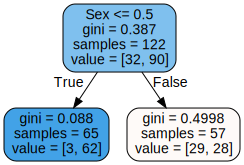

In [40]:
random.seed(1)
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit( train_x,train_y )
pridict_d_1 = clf.predict(test_x)
pridict_d_2 = clf.predict(train_x)
accuracy_train_1 = metrics.accuracy_score(train_y, pridict_d_2)
accuracy_test_1 = metrics.accuracy_score(test_y, pridict_d_1)
print("The Accuracy  on Train is ",accuracy_train_1)
print("The Accuracy  on Test is ",accuracy_test_1)
dot_data = tree.export_graphviz(clf,feature_names=cols,filled=True, rounded=True,out_file=None) 
graph = graphviz.Source(dot_data) 
graph

## Training a decision tree classifier with depth = 2

The Accuracy  on Train is  0.795081967213
The Accuracy  on Test is  0.803278688525


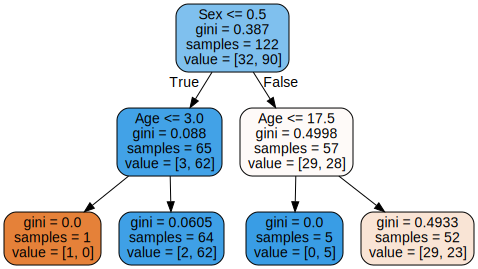

In [41]:
random.seed(1)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit( train_x,train_y )
pridict_d_1 = clf.predict(test_x)
pridict_d_2 = clf.predict(train_x)
accuracy_train_2 = metrics.accuracy_score(train_y, pridict_d_2)
accuracy_test_2 = metrics.accuracy_score(test_y, pridict_d_1)
print("The Accuracy  on Train is ",accuracy_train_2)
print("The Accuracy  on Test is ",accuracy_test_2)
dot_data = tree.export_graphviz(clf,feature_names=cols,filled=True, rounded=True,out_file=None) 
graph = graphviz.Source(dot_data) 
graph

## Training a decision tree classifier with depth = 3

The Accuracy  on Train is  0.795081967213
The Accuracy  on Test is  0.803278688525
The Accuracy  on Train is  0.795081967213
The Accuracy  on Test is  0.803278688525


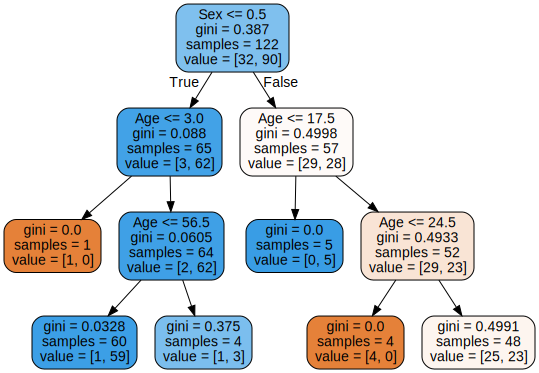

In [42]:
random.seed(1)
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit( train_x,train_y )
pridict_d_1 = clf.predict(test_x)
pridict_d_2 = clf.predict(train_x)
accuracy_train_3 = metrics.accuracy_score(train_y, pridict_d_2)
accuracy_test_3 = metrics.accuracy_score(test_y, pridict_d_1)
print("The Accuracy  on Train is ",accuracy_train_3)
print("The Accuracy  on Test is ",accuracy_test_3)
print("The Accuracy  on Train is ",metrics.accuracy_score(train_y, pridict_d_2))
print("The Accuracy  on Test is ",metrics.accuracy_score(test_y, pridict_d_1))
dot_data = tree.export_graphviz(clf,feature_names=cols,filled=True, rounded=True,out_file=None) 
graph = graphviz.Source(dot_data) 
graph

## Training a decision tree classifier with depth = 4

In [43]:
random.seed(1)
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit( train_x,train_y )
pridict_d_1 = clf.predict(test_x)
pridict_d_2 = clf.predict(train_x)
accuracy_train_4 = metrics.accuracy_score(train_y, pridict_d_2)
accuracy_test_4 = metrics.accuracy_score(test_y, pridict_d_1)
print("The Accuracy  on Train is ",accuracy_train_4)
print("The Accuracy  on Test is ",accuracy_test_4)

The Accuracy  on Train is  0.827868852459
The Accuracy  on Test is  0.606557377049


## Training a decision tree classifier with depth = 5

In [44]:
random.seed(1)
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit( train_x,train_y )
pridict_d_1 = clf.predict(test_x)
pridict_d_2 = clf.predict(train_x)
accuracy_train_5 = metrics.accuracy_score(train_y, pridict_d_2)
accuracy_test_5 = metrics.accuracy_score(test_y, pridict_d_1)
print("The Accuracy  on Train is ",accuracy_train_5)
print("The Accuracy  on Test is ",accuracy_test_5)

The Accuracy  on Train is  0.852459016393
The Accuracy  on Test is  0.786885245902


## Training a decision tree classifier with depth = 6

In [45]:
random.seed(1)
clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit( train_x,train_y )
pridict_d_1 = clf.predict(test_x)
pridict_d_2 = clf.predict(train_x)
accuracy_train_6 = metrics.accuracy_score(train_y, pridict_d_2)
accuracy_test_6 = metrics.accuracy_score(test_y, pridict_d_1)
print("The Accuracy  on Train is ",accuracy_train_6)
print("The Accuracy  on Test is ",accuracy_test_6)

The Accuracy  on Train is  0.868852459016
The Accuracy  on Test is  0.655737704918


In [53]:
t = Table()
train_accuracy = [accuracy_train_6,accuracy_train_5,accuracy_train_4,accuracy_train_3,accuracy_train_2,accuracy_train_1]
train_accuracy = [i*100 for i in train_accuracy]
test_accuracy = [accuracy_test_6,accuracy_test_5,accuracy_test_4,accuracy_test_3,accuracy_test_2,accuracy_test_1]
test_accuracy = [i*100 for i in test_accuracy]
t['Tree Depth'] = range(1,7)
t['Train Accuracy'] = Column(train_accuracy, unit = '%')
t['Test Accuracy'] = Column(test_accuracy, unit = '%')
print(t)

Tree Depth Train Accuracy Test Accuracy
                 %              %      
---------- -------------- -------------
         1  86.8852459016 65.5737704918
         2  85.2459016393 78.6885245902
         3  82.7868852459 60.6557377049
         4  79.5081967213 80.3278688525
         5  79.5081967213 80.3278688525
         6  74.5901639344 73.7704918033


# Analysis and Discussion 

1. **How does the tree change from one depth to another?**  
    The tree gets more involved with the data as it becomes more transperent in a sense that we can understand why does
    it provide such classfication
* **Do the trees make sense to you?**  
    The tree does make sense. For example, the first attribute it choses is the gender of the passenger
    then age. As these 2 are the main factors of survival. These attributes refer to the physical abilities of a passenger
    and that seems logical in a survival situation.
* **How does the performance on the train set change as a function of depth?**  
    It is very evident that as the depth of the tree increases the accuracy wof the training model will decrease as well.
* **How does the performance on the test set change as a function of depth?**  
    We can see that for the test the accuracy increased by depth and then decreased back again after depth 5.
    Which might seem as counter intiutive at first, as one would think larger tree then more accuracy but then we realize that
    we have fallen to the pit hole that our model is just to specific for our training dataset and just won't generalize well.
    (Occazm's Razor Principle)
* **Any other observation you'd like to add?**  
    Something that I found interesting is that initially I expected the socio-economic status to play a significant factor
    in the survival chances. People from a higher class would have more money and servant who would assist and ensure thier
    survival but it seems that in the case of life endangerment- every man is for his own.